In [32]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

## Create Visibility graph

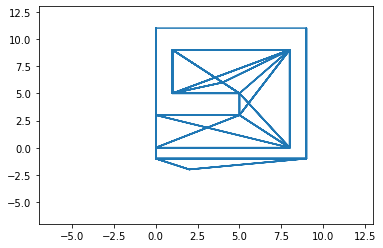

In [34]:
import itertools
import matplotlib.pyplot as plt


#Creating polygonal environment 
coord = [[0,-1], [9,-1], [9,11], [0,11], [0,3],[5,3],[5,5],[1,5],[1,9],[8,9],[8,0],[0,0]]
coord.append(coord[0])  

# Goal Node
coord1 = [[4,6],[4.06,6],[4.06,5.94],[4,5.94]]
coord1.append(coord1[0])  

# Start Node
coord2 = [[2,-2],[2,-1.94],[2.06,-2],[2.06,-2]]
coord2.append(coord2[0]) 

coord4 = v
#Creating Visibility Graph
l=[[[0,-1],[9,-1]],
   [[0,0],[2,-2],[0,3],[0,11],[9,-1]],
   [[0,-1],[2,-2],[9,11]],
   [[9,-1],[0,11]],
   [[0,0],[0,-1],[0,3]],
   [[0,0],[5,3],[0,11],[0,-1],[8,0]],
   [[0,0],[0,3],[8,0],[8,9],[5,5]],
   [[5,5],[8,0],[5,3],[4,6],[1,5],[1,9],[8,9]],
   [[1,9],[4,6],[8,9],[5,5]],
   [[8,9],[5,5],[1,5],[4,6]],
   [[5,3],[5,5],[5,3],[1,5],[8,0],[4,6]],
   [[1,9],[1,5],[8,9],[5,5]],
   [[8,9],[5,3],[5,5],[0,3],[0,0]],
   [[0,3],[5,3],[8,0],[0,-1]]]
c=[[2,-2],[0,-1],[9,-1],[9,11],[0,11],[0,3],[5,3],[5,5],[1,5],[1,9],[8,9],[4,6],[8,0],[0,0]]
coord3=[]
for i in range(len(c)):
    for k in l[i]:
        coord3.append((c[i],k))
    
coord3 = list(itertools.chain(*coord3))

xc, yc = zip(*coord3)
#xs, ys = zip(*coord) # create lists of x and y values
#xa, ya = zip(*coord1)
#xb, yb = zip(*coord2)
xd, yd = zip(*coord4)
plt.figure()
#plt.plot(xs,ys) 
#plt.plot(xa,ya)
#plt.plot(xb,yb)
plt.plot(xc,yc) 
plt.xlim(-7,13)
plt.ylim(-7,13)
plt.show() 

## Creating Adjacency graph

In [35]:
#takes two points computes distance

def disttp(a,b):
    squared_value= np.sqrt((b[1]-a[1])**2 + (b[0]-a[0])**2)
    return squared_value

In [36]:
l=[[[0,-1],[9,-1]],
   [[0,0],[2,-2],[0,3],[0,11],[9,-1]],
   [[0,-1],[2,-2],[9,11]],
   [[9,-1],[0,11]],
   [[0,0],[0,-1],[0,3]],
   [[0,0],[5,3],[0,11],[0,-1],[8,0]],
   [[0,0],[0,3],[8,0],[8,9],[5,5]],
   [[5,5],[8,0],[5,3],[4,6],[1,5],[1,9],[8,9]],
   [[1,9],[4,6],[8,9],[5,5]],
   [[8,9],[5,5],[1,5],[4,6]],
   [[5,3],[5,5],[5,3],[1,5],[8,0],[4,6]],
   [[1,9],[1,5],[8,9],[5,5]],
   [[8,9],[5,3],[5,5],[0,3],[0,0]],
   [[0,3],[5,3],[8,0],[0,-1]]]

m=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
c=[[2,-2],[0,-1],[9,-1],[9,11],[0,11],[0,3],[5,3],[5,5],[1,5],[1,9],[8,9],[4,6],[8,0],[0,0]]
dict={}
for i in range(len(m)):
    dict[m[i]] = c[i]

In [37]:
key_list = list(dict.keys())
val_list = list(dict.values())
 
adj_list={}
for i in range(len(c)):
    temp=[]
    for j in l[i]:
        position = val_list.index(j)
        
        dist = disttp(c[i],j)
        temp.append((key_list[position],dist))
        
    adj_list[m[i]]=temp

In [20]:
adj_list

{'A': [('B', 2.23606797749979), ('C', 7.0710678118654755)],
 'B': [('N', 1.0),
  ('A', 2.23606797749979),
  ('F', 4.0),
  ('E', 12.0),
  ('C', 9.0)],
 'C': [('B', 9.0), ('A', 7.0710678118654755), ('D', 12.0)],
 'D': [('C', 12.0), ('E', 9.0)],
 'E': [('N', 11.0), ('B', 12.0), ('F', 8.0)],
 'F': [('N', 3.0),
  ('G', 5.0),
  ('E', 8.0),
  ('B', 4.0),
  ('M', 8.54400374531753)],
 'G': [('N', 5.830951894845301),
  ('F', 5.0),
  ('M', 4.242640687119285),
  ('K', 6.708203932499369),
  ('H', 2.0)],
 'H': [('H', 0.0),
  ('M', 5.830951894845301),
  ('G', 2.0),
  ('L', 1.4142135623730951),
  ('I', 4.0),
  ('J', 5.656854249492381),
  ('K', 5.0)],
 'I': [('J', 4.0),
  ('L', 3.1622776601683795),
  ('K', 8.06225774829855),
  ('H', 4.0)],
 'J': [('K', 7.0),
  ('H', 5.656854249492381),
  ('I', 4.0),
  ('L', 4.242640687119285)],
 'K': [('G', 6.708203932499369),
  ('H', 5.0),
  ('G', 6.708203932499369),
  ('I', 8.06225774829855),
  ('M', 9.0),
  ('L', 5.0)],
 'L': [('J', 4.242640687119285),
  ('I', 3.162

## A* algorithm code

In [38]:
from collections import deque

class Graph:
    # example of adjacency list (or rather map)
    # adjacency_list = {
    # 'A': [('B', 1), ('C', 3), ('D', 7)],
    # 'B': [('D', 5)],
    # 'C': [('D', 12)]
    # }

    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    # heuristic function with equal values for all nodes
    def h(self, n):
        #m=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
        H={'A':6,'B':4,'C':4,'D':2.5,'E':2.7,'F':2.7,'G':0.5,'H':0.37,'I':0.6,'J':0.7,'K':0.7,'L':0,'M':3.75,'N':4}
        #for i in range(len(m)):
         #   H[m[i]]=0
        
        
        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

## gives shortest path

In [39]:
graph1 = Graph(adj_list)
k=graph1.a_star_algorithm('A', 'L')

Path found: ['A', 'B', 'N', 'G', 'H', 'L']


In [40]:
v = [dict[key] for key in k]

In [41]:
#coordinates of vertex that lead to shortest path
v

[[2, -2], [0, -1], [0, 0], [5, 3], [5, 5], [4, 6]]

## plot everything together

In [43]:
#Creating polygonal environment 
coord = [[0,-1], [9,-1], [9,11], [0,11], [0,3],[5,3],[5,5],[1,5],[1,9],[8,9],[8,0],[0,0]]
coord.append(coord[0])  

# Goal Node
coord1 = [[4,6],[4.06,6],[4.06,5.94],[4,5.94]]
coord1.append(coord1[0])  

# Start Node
coord2 = [[2,-2],[2,-1.94],[2.06,-2],[2.06,-2]]
coord2.append(coord2[0]) 

#optimal path coordinates of vertexes that froms the optimal path
coord4 = v

#Creating Visibility Graph
l=[[[0,-1],[9,-1]],
   [[0,0],[2,-2],[0,3],[0,11],[9,-1]],
   [[0,-1],[2,-2],[9,11]],
   [[9,-1],[0,11]],
   [[0,0],[0,-1],[0,3]],
   [[0,0],[5,3],[0,11],[0,-1],[8,0]],
   [[0,0],[0,3],[8,0],[8,9],[5,5]],
   [[5,5],[8,0],[5,3],[4,6],[1,5],[1,9],[8,9]],
   [[1,9],[4,6],[8,9],[5,5]],
   [[8,9],[5,5],[1,5],[4,6]],
   [[5,3],[5,5],[5,3],[1,5],[8,0],[4,6]],
   [[1,9],[1,5],[8,9],[5,5]],
   [[8,9],[5,3],[5,5],[0,3],[0,0]],
   [[0,3],[5,3],[8,0],[0,-1]]]
c=[[2,-2],[0,-1],[9,-1],[9,11],[0,11],[0,3],[5,3],[5,5],[1,5],[1,9],[8,9],[4,6],[8,0],[0,0]]
coord3=[]
for i in range(len(c)):
    for k in l[i]:
        coord3.append((c[i],k))
    
coord3 = list(itertools.chain(*coord3))

Text(0.5, 1.0, 'Optimal Path in Environment')

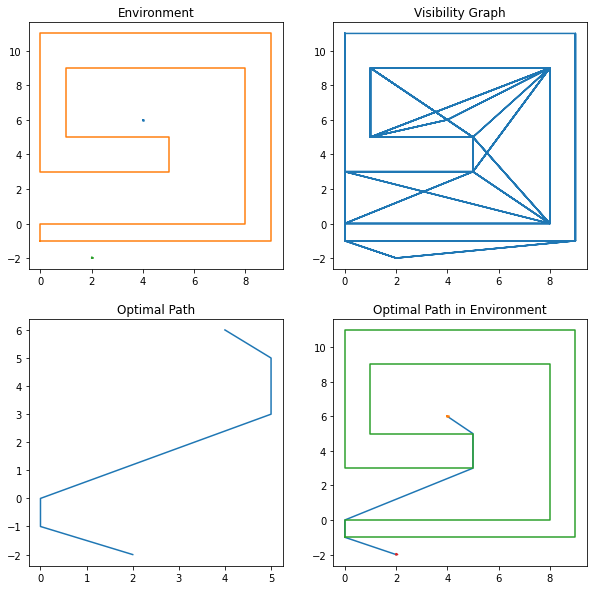

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import math 
figure, axis = plt.subplots(2, 2,figsize=(10, 10))

xs, ys = zip(*coord) 
xa, ya = zip(*coord1)
xb, yb = zip(*coord2)
xd, yd = zip(*coord4)
xc, yc = zip(*coord3)

axis[0, 0].plot(xa,ya)
axis[0, 0].plot(xs,ys)
axis[0, 0].plot(xb,yb)
axis[0, 0].set_title("Environment")
  
# Visibility graph
axis[0, 1].plot(xc, yc)
axis[0, 1].set_title("Visibility Graph")
  
# optimal path
axis[1, 0].plot(xd,yd)
axis[1, 0].set_title("Optimal Path")
  
#Environment and optimal path
axis[1, 1].plot(xd,yd)
axis[1, 1].plot(xa,ya)
axis[1, 1].plot(xs,ys)
axis[1, 1].plot(xb,yb)
axis[1, 1].set_title("Optimal Path in Environment")
  

Bug 0 algorithm doesn't reach goal at all but using A* we are not only able

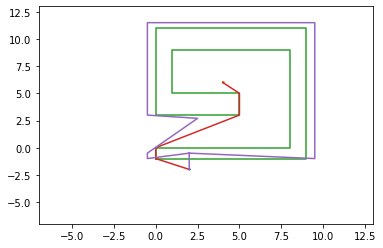

In [50]:
#Creating polygonal environment 
coord = [[0,-1], [9,-1], [9,11], [0,11], [0,3],[5,3],[5,5],[1,5],[1,9],[8,9],[8,0],[0,0]]
coord.append(coord[0])  

# Goal Node
coord1 = [[4,6],[4.06,6],[4.06,5.94],[4,5.94]]
coord1.append(coord1[0])  

# Start Node
coord2 = [[2,-2],[2,-1.94],[2.06,-2],[2.06,-2]]
coord2.append(coord2[0]) 

#optimal path coordinates of vertexes that froms the optimal path
coord4 = v

#Bug algorithm path
coord5=[[2,-2],[2,-0.5],[-0.5,-1],[-0.5,-0.5],[2.5,2.7],[-0.5,3],[-0.5,11.5],[9.5,11.5],[9.5,-1],[2,-0.5]]

xs, ys = zip(*coord) 
xa, ya = zip(*coord1)
xb, yb = zip(*coord2)
xd, yd = zip(*coord4)
xe, ye = zip(*coord5)

plt.figure() 

plt.plot(xb,yb)
plt.plot(xa,ya)
plt.plot(xs,ys)
plt.plot(xd,yd)
plt.plot(xe,ye)

plt.xlim(-7,13)
plt.ylim(-7,13)
plt.show() 